# <p style="text-align: center;">Long Short Term Memory (LSTM) example in Keras <br>for predicting time series<br>that uses multiple input features
</p>

<p style="text-align: center;">
 by Prof. Dr.-Ing. Jürgen Brauer, http://www.juergenbrauer.org
</p>

## Table of Contents

## 1. Prepare input and output time series

In [60]:
import numpy as np

x = np.arange(0,100, 0.1)
x1 = [np.cos(value) for value in x]
x2 = []
value = 0.0
counter = -100
for i in range(0, len(x)):
    if counter<0:
        value -= 0.01
    if counter>0:
        value += 0.01
    counter +=1
    
    if counter==100:
        counter=-100
        
    x2.append(value)
x1 = np.array(x1)
x2 = np.array(x2)

y = (np.array(x1)+np.array(x2)) / 2.0

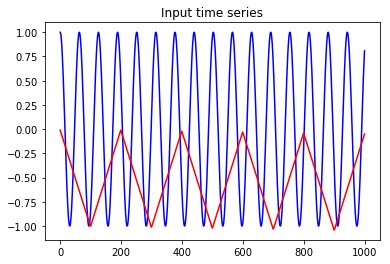

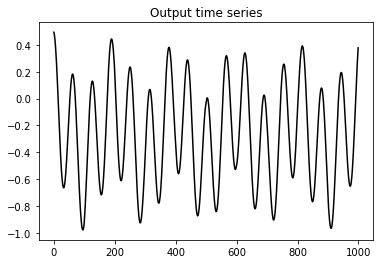

In [61]:
import matplotlib.pyplot as plt

plt.plot(x1, "blue")
plt.plot(x2, "red")
plt.title("Input time series")
plt.show()

plt.plot(y, "black")
plt.title("Output time series")
plt.show()



## 2. Prepare the training data for the LSTM

In [87]:
# The training data input for the Keras LSTM has to be matrix dataX
# with shape:
#   [samples, time steps, features]    

def to_sequence_data(inp_series1, inp_series2, out_series, n=3, m=1):
    dataX, dataY = [], []
    for i in range( len(inp_series1)-n-1 ):
        col1 = inp_series1[ i : i+n ]        
        col2 = inp_series2[ i : i+n ]
        
        M = np.zeros((n,2))
        M[:,0] = col1
        M[:,1] = col2
                
        dataX.append( M )
                
        dataY.append( out_series[ i+n : i+n+m ] )
    return np.array(dataX), np.array(dataY)

# Try case #1, then case #2, then case #3:

# Case #1:
# We have two input features x1,x2
trainX, trainY = to_sequence_data(x1,x2,y,3,1)

# Case #2:
# We have just input feature x1 available
#trainX, trainY = to_sequence_data(x1,x1,y,3,1)

# Case #3:
# We have just input feature x2 available
#trainX, trainY = to_sequence_data(x2,x2,y,3,1)


nr_training_samples = trainX.shape[0]
print("I have generated", nr_training_samples, "training samples.")

print("Shape of trainX is", trainX.shape)
print("Shape of trainY is", trainY.shape)

print("\n",trainX[0], "-->", trainY[0])
print("\n",trainX[1], "-->", trainY[1])
print("\n",trainX[2], "-->", trainY[2])

I have generated 996 training samples.
Shape of trainX is (996, 3, 2)
Shape of trainY is (996, 1)

 [[ 1.         -0.01      ]
 [ 0.99500417 -0.02      ]
 [ 0.98006658 -0.03      ]] --> [0.45766824]

 [[ 0.99500417 -0.02      ]
 [ 0.98006658 -0.03      ]
 [ 0.95533649 -0.04      ]] --> [0.4355305]

 [[ 0.98006658 -0.03      ]
 [ 0.95533649 -0.04      ]
 [ 0.92106099 -0.05      ]] --> [0.40879128]


## 3. Build the Keras model and train it

In [88]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

nr_inp_time_steps = 3
nr_input_features = 2

model = Sequential()
model.add(LSTM(4, input_shape=(nr_inp_time_steps, nr_input_features)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')    
model.fit(trainX,
          trainY,
          epochs=200,
          batch_size=32,
          verbose=2)

Epoch 1/200
 - 1s - loss: 0.3613
Epoch 2/200
 - 0s - loss: 0.2812
Epoch 3/200
 - 0s - loss: 0.2180
Epoch 4/200
 - 0s - loss: 0.1659
Epoch 5/200
 - 0s - loss: 0.1225
Epoch 6/200
 - 0s - loss: 0.0872
Epoch 7/200
 - 0s - loss: 0.0589
Epoch 8/200
 - 0s - loss: 0.0378
Epoch 9/200
 - 0s - loss: 0.0237
Epoch 10/200
 - 0s - loss: 0.0157
Epoch 11/200
 - 0s - loss: 0.0116
Epoch 12/200
 - 0s - loss: 0.0099
Epoch 13/200
 - 0s - loss: 0.0092
Epoch 14/200
 - 0s - loss: 0.0089
Epoch 15/200
 - 0s - loss: 0.0086
Epoch 16/200
 - 0s - loss: 0.0084
Epoch 17/200
 - 0s - loss: 0.0082
Epoch 18/200
 - 0s - loss: 0.0080
Epoch 19/200
 - 0s - loss: 0.0078
Epoch 20/200
 - 0s - loss: 0.0076
Epoch 21/200
 - 0s - loss: 0.0074
Epoch 22/200
 - 0s - loss: 0.0072
Epoch 23/200
 - 0s - loss: 0.0070
Epoch 24/200
 - 0s - loss: 0.0069
Epoch 25/200
 - 0s - loss: 0.0067
Epoch 26/200
 - 0s - loss: 0.0066
Epoch 27/200
 - 0s - loss: 0.0064
Epoch 28/200
 - 0s - loss: 0.0063
Epoch 29/200
 - 0s - loss: 0.0061
Epoch 30/200
 - 0s - lo

## 4. Test prediction on train data

Shape of trainPredict is (996, 1)


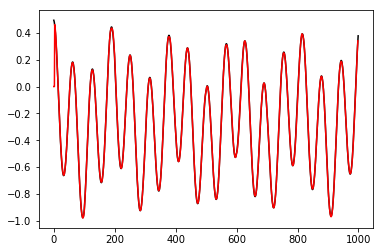

In [89]:
trainPredict = model.predict(trainX)
print("Shape of trainPredict is", trainPredict.shape)
trainPredict = trainPredict.reshape(-1)
#print(trainPredict)

# plot ground truth time series
plt.plot(y, "black")

# plot calculated time series
graph_pred_train = np.zeros(nr_inp_time_steps+len(trainPredict))
graph_pred_train[nr_inp_time_steps:] = trainPredict
plt.plot(graph_pred_train, "red")

plt.show()